In [23]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
pd.options.display.max_columns = 50

In [16]:
# Read data
df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-042219-lectures/master/Module_4/classification_evaluation_mini_project/classification_lab_data.csv')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0


In [17]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000
mean,167825.729405,1.603608,1.856786,1.550773,35.523230,-0.014959,-0.134839,-0.165632,-0.217092,-0.261344,-0.285845,51589.034710,49521.698112,4.747483e+04,43796.589775,40748.049169,39226.852411,5687.720113,6.019571e+03,5253.322805,4824.490687,4825.033793,5245.642943,0.221176
std,129915.115993,0.489158,0.791939,0.522431,9.253986,1.120903,1.193044,1.193515,1.168719,1.133016,1.150394,74104.132627,71551.215125,7.001082e+04,64927.450125,61257.537699,60075.536736,16698.506577,2.454136e+04,17967.028860,15730.753527,15596.580167,17795.775322,0.415047
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-67526.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3577.500000,2958.000000,2.718000e+03,2392.500000,1801.000000,1280.000000,1000.000000,8.585000e+02,395.000000,300.000000,269.500000,125.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22472.000000,21290.000000,2.022300e+04,19145.000000,18227.000000,17175.000000,2110.000000,2.012000e+03,1809.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67767.000000,64635.500000,6.096200e+04,55418.000000,50581.000000,49434.500000,5020.000000,5.000000e+03,4561.000000,4089.000000,4029.500000,4008.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [18]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [3]:
!ls

Mod4_Rob_MJ.ipynb           classification_lab_data.csv
Project4_Rob_MJ.ipynb       features-2.py
Project5.ipynb              features.py
README.md                   output.csv


In [4]:
!cat features.py

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression


def feature_engineering(data):
    
    df = data
    
    print('creating and binning columns')
    
    df['EDUCATION_Y']=df['EDUCATION'].isin([1,2]).astype(int)
    df['EDUCATION_N']=df['EDUCATION'].isin([3,4,5,6]).astype(int)

    df['AGE_to_28']=df['AGE'].isin(list(range(0,29))).astype(int)
    df['AGE_29_34']=df['AGE'].isin([29,30,31,32,33,32,33,34]).astype(int)
    df['AGE_35_42']=df['AGE'].isin([35,36,37,38,39,40,41,42]).astype(int)
    df['AGE_43_above']=df['AGE'].isin(list(range(43,100))).astype(int)

#     ----
    
#     dummies = pd.get_dummies(df['p

In [22]:
%run features.py
df = feature_engineering(pd.read_csv('classification_lab_data.csv'))


creating and binning columns
transforming pay and bill columns
creating pay_score_sum column
creating monthly balances
determining monthly credit balances over 80% of limit 
creating credit_over_80 column
Filtering features
dropping columns
complete!


In [20]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'sep_bill', 'aug_bill', 'jul_bill', 'jun_bill',
       'may_bill', 'apr_bill', 'aug_bill_payment', 'jul_bill_payment',
       'jun_bill_payment', 'may_bill_payment', 'apr_bill_payment',
       'mar_bill_payment', 'default payment next month', 'EDUCATION_Y',
       'EDUCATION_N', 'AGE_to_28', 'AGE_29_34', 'AGE_35_42', 'AGE_43_above',
       'bal_1', 'bal_2', 'bal_3', 'bal_4', 'credit_over_80', 'score_1',
       'score_2', 'score_3', 'score_4'],
      dtype='object')

In [21]:
df.head()# Data shape
print('data:',df.shape)

data: (23999, 37)


In [8]:
# View first few rows
df.head(3)

,LIMIT_BAL,SEX,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,sep_bill,aug_bill,jul_bill,jun_bill,may_bill,apr_bill,aug_bill_payment,jul_bill_payment,jun_bill_payment,may_bill_payment,apr_bill_payment,mar_bill_payment,default payment next month,EDUCATION_Y,EDUCATION_N,AGE_to_28,AGE_29_34,AGE_35_42,AGE_43_above,bal_1,bal_2,bal_3,bal_4,credit_over_80,score_1,score_2,score_3,score_4
0,50000,1,2,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1,1,0,0,0,0,1,87795,89525,89418,98228,1,0,1,0,0
1,30000,1,1,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0,1,0,0,0,1,0,20199,17273,14253,9714,0,0,1,0,0
2,260000,1,2,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0,1,0,1,0,0,0,99796,97589,54138,37334,0,0,1,0,0


In [9]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 37 columns):
LIMIT_BAL                     23999 non-null int64
SEX                           23999 non-null int64
MARRIAGE                      23999 non-null int64
PAY_0                         23999 non-null int64
PAY_2                         23999 non-null int64
PAY_3                         23999 non-null int64
PAY_4                         23999 non-null int64
PAY_5                         23999 non-null int64
PAY_6                         23999 non-null int64
sep_bill                      23999 non-null int64
aug_bill                      23999 non-null int64
jul_bill                      23999 non-null int64
jun_bill                      23999 non-null int64
may_bill                      23999 non-null int64
apr_bill                      23999 non-null int64
aug_bill_payment              23999 non-null int64
jul_bill_payment              23999 non-null int64
jun_bill_payment        

In [10]:
categorical = ['SEX','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for col in categorical:
    print(col + ':' + str(sorted(df[col].unique())))

SEX:[1, 2]
MARRIAGE:[0, 1, 2, 3]
PAY_0:[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_2:[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_3:[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_4:[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
PAY_5:[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
PAY_6:[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


In [11]:
# Rename a key column for convenience
df.rename(index=str, columns={"default payment next month": "DEFAULT"}, inplace=True)

In [12]:
#use pairplot to look at selected variables with pairwise scatterplot. Looking for non-linear shapes to engineer.
sns.set()
cols = ['DEFAULT','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE']
sns.pairplot(df[cols], height = 2.5)
plt.show();

KeyError: "['AGE', 'EDUCATION'] not in index"

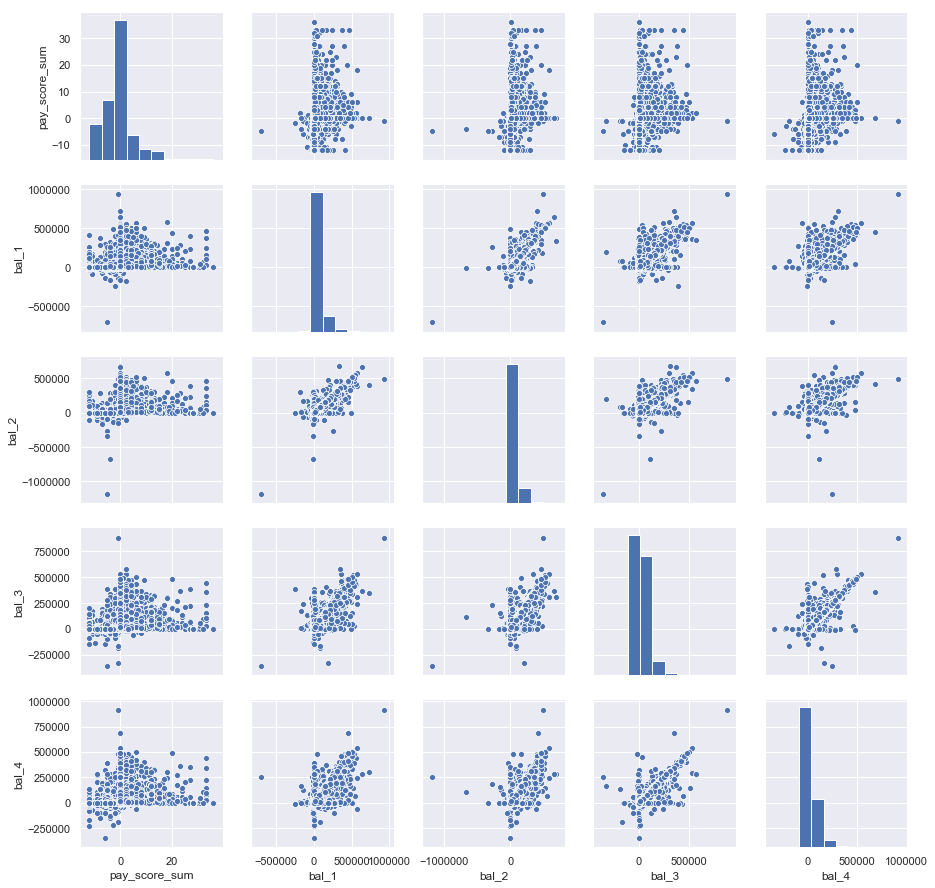

In [21]:
sns.set()
cols = ['pay_score_sum','bal_1','bal_2','bal_3','bal_4']
sns.pairplot(df[cols], height = 2.5)
plt.show();

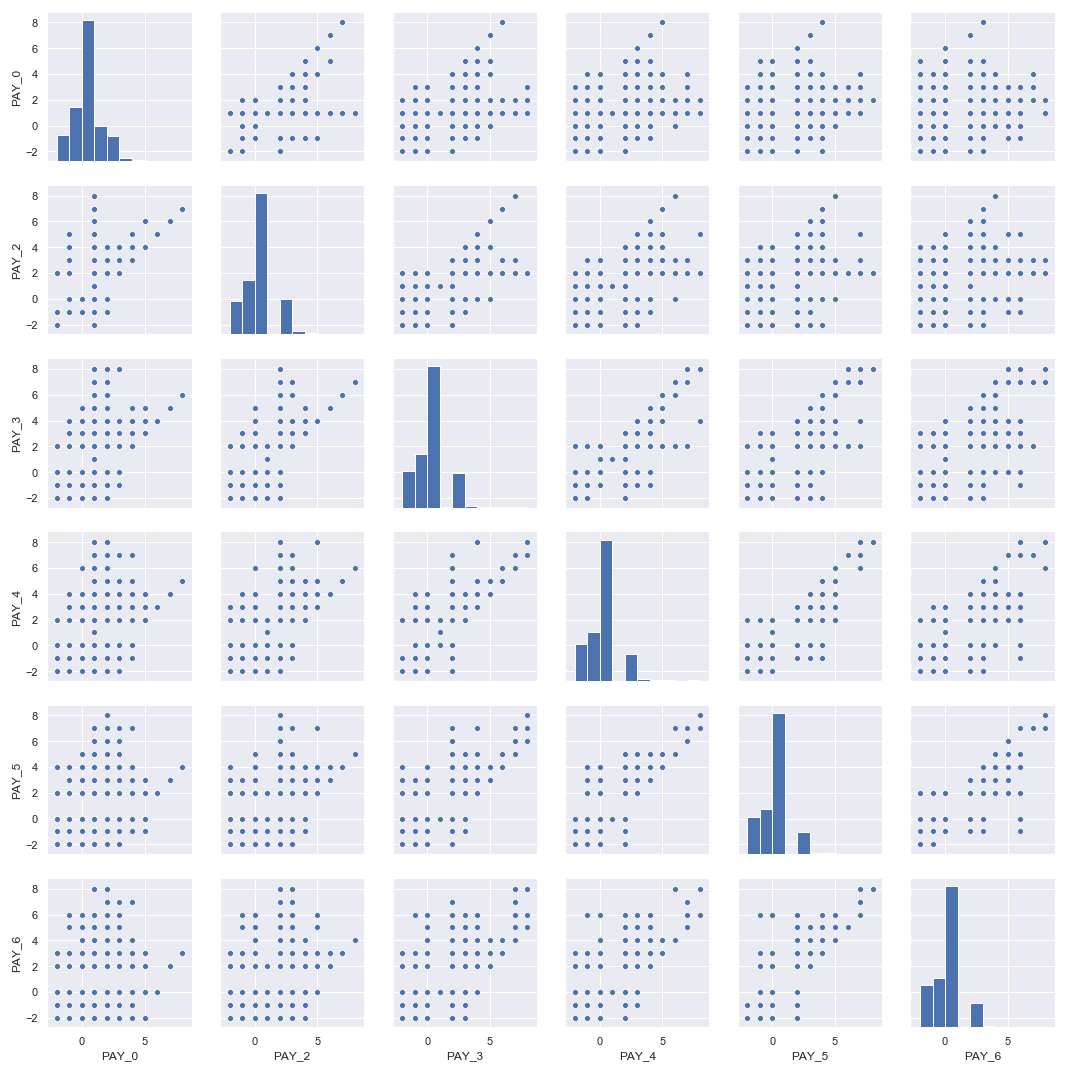

In [22]:
sns.set()
cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
sns.pairplot(df[cols], height = 2.5)
plt.show();

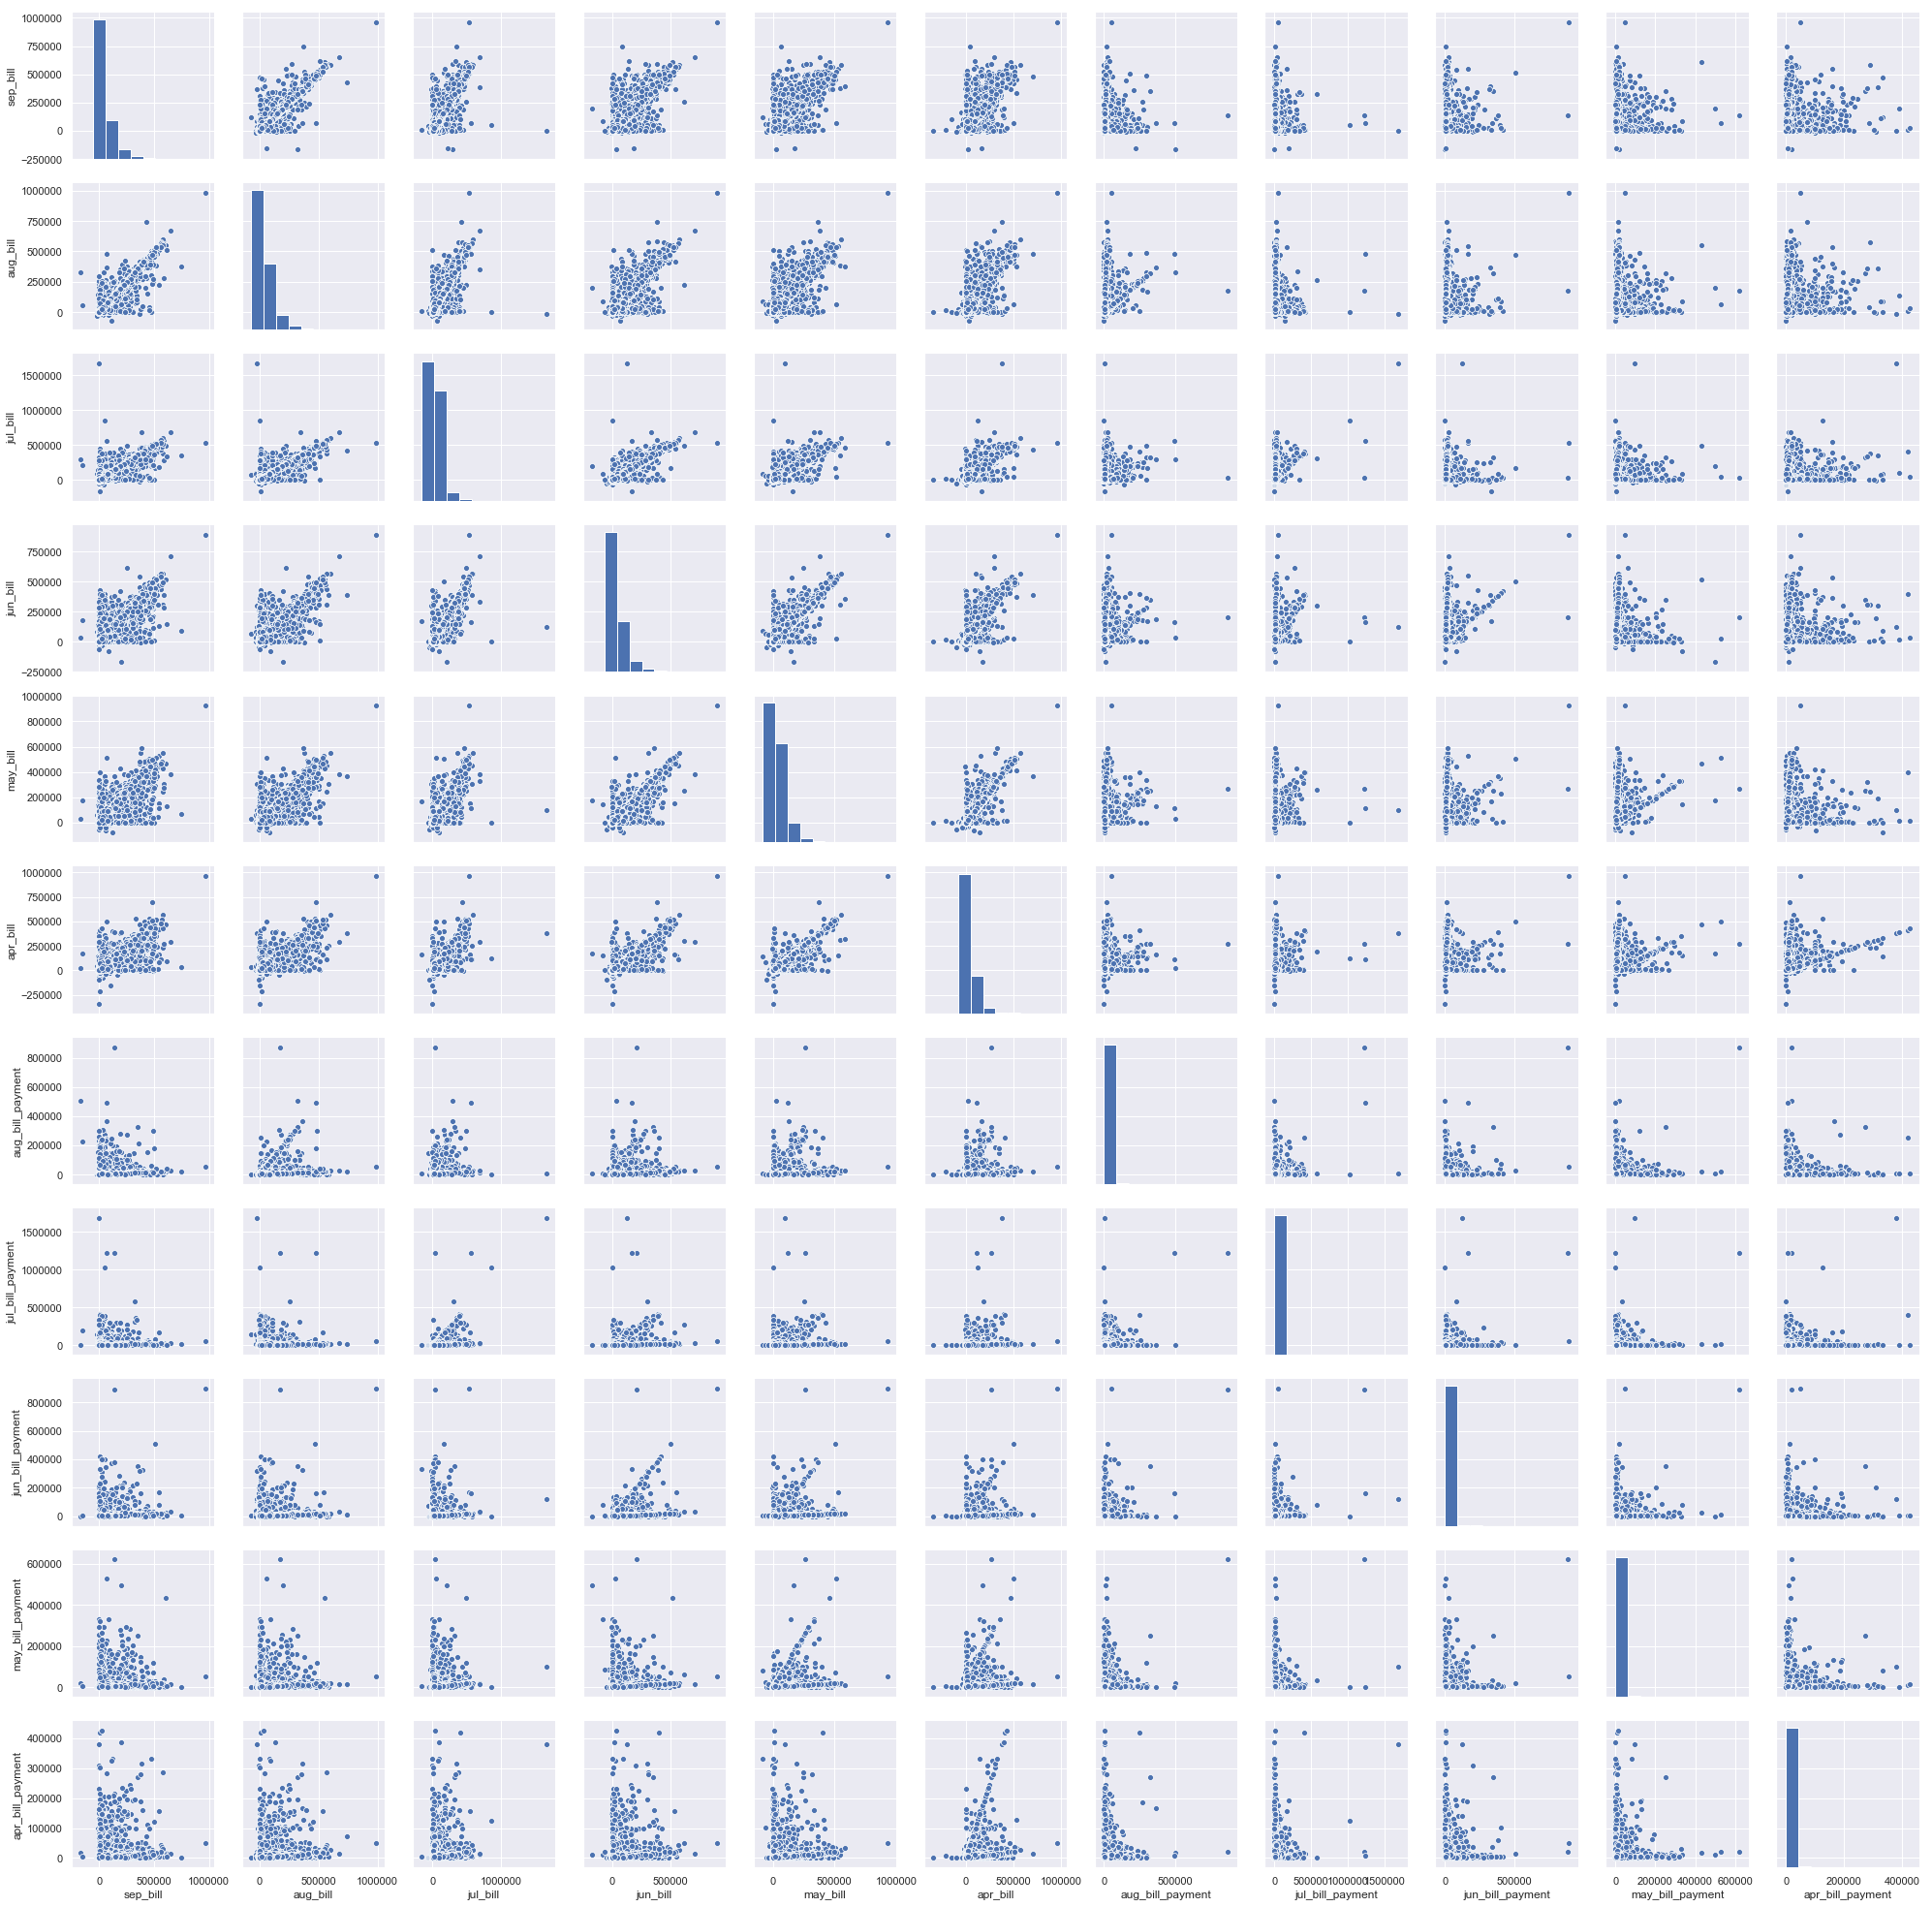

In [23]:
sns.set()
cols = ['sep_bill','aug_bill','jul_bill','jun_bill','may_bill','apr_bill','aug_bill_payment','jul_bill_payment','jun_bill_payment','may_bill_payment','apr_bill_payment']
sns.pairplot(df[cols], height = 2.5)
plt.show();

### **GETTING MODEL READY**
Now that we've explored the data, it is time to get these features 'model ready'. Categorial features will need to be converted into 'dummy variables', otherwise a machine learning algorithm will not be able to take in those features as inputs.

In [69]:
# Shape of train data
df.shape

(23999, 37)

In [101]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'sep_bill', 'aug_bill', 'jul_bill', 'jun_bill',
       'may_bill', 'apr_bill', 'aug_bill_payment', 'jul_bill_payment',
       'jun_bill_payment', 'may_bill_payment', 'apr_bill_payment',
       'mar_bill_payment', 'default payment next month', 'EDUCATION_Y',
       'EDUCATION_N', 'AGE_to_28', 'AGE_29_34', 'AGE_35_42', 'AGE_43_above',
       'bal_1', 'bal_2', 'bal_3', 'bal_4', 'credit_over_80', 'score_1',
       'score_2', 'score_3', 'score_4'],
      dtype='object')

In [71]:
selected_columns = 

In [138]:
# Rename a key column for convenience
df.rename(index=str, columns={"default payment next month": "DEFAULT"}, inplace=True)

In [85]:
#category = ['SEX','MARRIAGE']
#dfMJ.select_dtypes([category]).columns

In [94]:
#full_columns = ['LIMIT_BAL','SEX','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','sep_bill','aug_bill',
     #           'jul_bill','jun_bill','may_bill','apr_bill','aug_bill_payment','jul_bill_payment','jun_bill_payment',
     #           'may_bill_payment','apr_bill_payment','mar_bill_payment','EDUCATION_Y','EDUCATION_N''AGE_to_28','AGE_29_34','AGE_35_42',
     #           'AGE_43_above','bal_1','bal_2','bal_3','bal_4','credit_over_80','score_1','score_2','score_3','score_4']

In [139]:
#Split data to be used in the models
# Create matrix of features
X = df.drop(['DEFAULT'], axis = 1) # grabs everything else but 'DEFAULT'

# Create target variable
y = df.DEFAULT

# Use X and y variables to split the training data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 34)

In [140]:
#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (17999, 36) Target:  (17999,)
Test set - Features:  (6000, 36) Target:  (6000,)


In [141]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns)

### **Base Model**
Develop a base model for these features, then perform additional feature engineering to determine which perform best. Use a simple framework: **Fit, Predict, Score.**

In [ ]:
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score
#from sklearn import metrics
#X_train = X_train[features]
#X_test = X_test[features]
#basemodel = LinearRegression().fit(X_train,y_train)
#base_y_hat = basemodel.predict(X_train)
#base_r2 =  r2_score(base_y_hat , y_train)
#print(f"base_model r^2 Train: {base_r2}")
#print(f"base_model r^2 Test: {r2_score(basemodel.predict(X_test),y_test)}")
#RMSE = np.sqrt(metrics.mean_squared_error(y_test, basemodel.predict(X_test)))
#print(f"Model prediciton is {round(RMSE/y_train.std(),3)} STDs off")

In [142]:
# Fit 
# Import model

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()

# Pass training data into model
lreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
# Predict
y_pred_lreg = lreg.predict(X_test)

In [144]:
# Score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))

# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[4490  214]
 [ 878  418]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4704
           1       0.66      0.32      0.43      1296

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000

--------------------------------------------------------------------------------
Accuracy 81.8 %


### **Interpretation**  
**Accuracy**  
81.8% of the model's predictions are correct.

**Precision**  
Precision is  measure of how precise the model's predictions are.  When the model predicts a default, that individual actually *did* default 80% of the time.

**Recall (Sensitivity)**  
If there a defaulting individual is present in the test set, the model is able to identify (recall) it 82% of the time.    

**F1 Score**  
F1 Score is the weighted average of precision and recall. An F1 Score of 79 means that 79% of the time:

- when the model predicts a default, you can be confident that person actually did default and it is not a false positive.
- when there is an actual defaulting person in the dataset, the model is able to detect it

We will use the F1 Score to assess progress with our model.


Confusion Matrix, without normalization
[[3856  848]
 [ 542  754]]


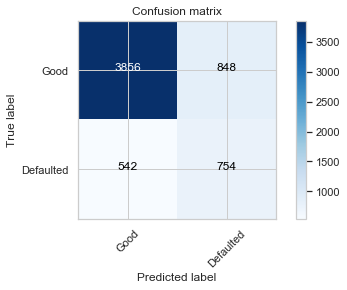

In [176]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_lreg)
classes = ['Good', 'Defaulted']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

## Visualizing Class Imbalance

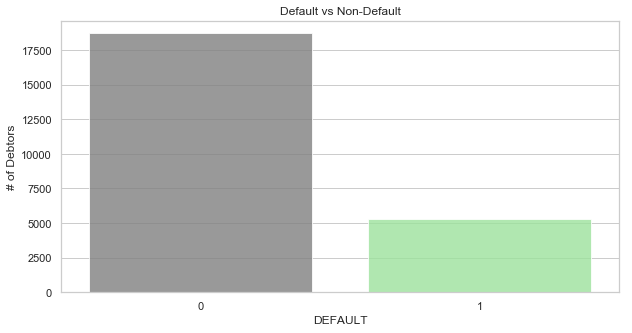

In [145]:
plt.figure(figsize = (10,5))
sns.countplot(y, alpha =.80, palette= ['grey','lightgreen'])
plt.title('Default vs Non-Default')
plt.ylabel('# of Debtors')
plt.show()

In [87]:
# setting up testing and training sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)



#scaler = StandardScaler()  
#scaler.fit(X_train)



#X_train = pd.DataFrame(scaler.transform(X_train), columns=selected_columns)
#X_test  = pd.DataFrame(scaler.transform(X_test), columns=selected_columns)


In [146]:
# concatenate our training data back together
resampling = X_train.copy()
resampling['DEFAULT']= y_train.values

In [147]:
# separate minority and majority classes
good_standing = resampling[resampling['DEFAULT']==0]
defaulted = resampling[resampling['DEFAULT']==1]

# Get a class count to understand the class imbalance.
print('good count: '+ str(len(good_standing)))
print('defaulted count: '+ str(len(defaulted)))

good count: 13987
defaulted count: 4012


### Smote for upsampling the minority

In [148]:
sm = SMOTE(random_state=23, ratio=1.0)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

#fit Model to resampled data

knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_sm, y_train_sm)

y_pred_class = knn.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_class))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, y_pred_class))

X_train = X_train_sm 
y_train = y_train_sm 

Test Accuracy score:  0.6653333333333333
Test F1 score:  0.44622173193601766


## New Models

### **Logistic Regression**   

In [172]:
# Fit 
# Import model

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()

# Pass training data into model
lreg.fit(X_train, y_train)

# Predict
y_pred_lreg = lreg.predict(X_test)

# Score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))

# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[3856  848]
 [ 542  754]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4704
           1       0.47      0.58      0.52      1296

    accuracy                           0.77      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.79      0.77      0.78      6000

--------------------------------------------------------------------------------
Accuracy 76.83 %


### **K-NEAREST NEIGHBORS**   

K-Nearest Neighbors (KNN) is used to classify new data points based on ‘distance’ to known data on a scatter plot with a two step process: 
1.  Find K nearest neighbors based on your distance metric
2.  Let them all vote on the classification 


KNN is different from the previous classifiers in that it requires variables to be standardized before the model is trained.  This is because the KNN classifier predicts the class of a given test observation by identifying the observations nearest to it.  Thus, the scale of the variables matters. 

Any variables that are on a large scale will have a much larger effect on the distance between the observations (and hence, on the KNN classifier)  than variables that are on a small scale. Therefore, everything should be standardized to the same scale when using k-nearest neighbors to classify.

In [40]:
# Standardize the Variables

# Import StandardScaler
#from sklearn.preprocessing import StandardScaler

# Create instance of standard scaler
#scaler = StandardScaler()

# Fit scaler object to feature columns
#scaler.fit(df.drop('DEFAULT', axis = 1)) # Everything but target variable 

# Use scaler object to do a transform columns
#scaled_features = scaler.transform(df.drop('DEFAULT', axis = 1)) # performs the standardization by centering and scaling
#scaled_features

array([[-0.90696285, -1.23400094,  0.85989554, ...,  1.13673572,
        -0.32486479, -0.22506067],
       [-1.06091273, -1.23400094, -1.05427133, ...,  1.13673572,
        -0.32486479, -0.22506067],
       [ 0.7095109 , -1.23400094,  0.85989554, ...,  1.13673572,
        -0.32486479, -0.22506067],
       ...,
       [-0.90696285,  0.81037215,  0.85989554, ...,  1.13673572,
        -0.32486479, -0.22506067],
       [ 1.01741066, -1.23400094,  0.85989554, ..., -0.87971195,
        -0.32486479, -0.22506067],
       [-0.82998791,  0.81037215, -1.05427133, ...,  1.13673572,
        -0.32486479, -0.22506067]])

In [41]:
# Use scaled features variable to re-create a features dataframe
#df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [42]:
# Split
# Import
#from sklearn.model_selection import train_test_split

# Create matrix of features
#x = df_feat

# Create target variable
#y = df['DEFAULT']

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 34)

In [149]:
# Fit
# Import model
from sklearn.neighbors import KNeighborsClassifier

# Create instance of model
knn = KNeighborsClassifier(n_neighbors = 1)

# Fit to training data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [150]:
# Predict
y_pred_knn = knn.predict(X_test)

In [151]:
# Score it
print('K-Nearest Neighbors (KNN)')
print('k = 1')
print('\n')
# Confusion Matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred_knn))

# Classification Report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_knn))

# Accuracy
print('--'*40)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn)*100,1)
print('Accuracy',knn_accuracy,'%')

K-Nearest Neighbors (KNN)
k = 1


Confusion Matrix
[[3645 1059]
 [ 715  581]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      4704
           1       0.35      0.45      0.40      1296

    accuracy                           0.70      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.70      0.72      6000

--------------------------------------------------------------------------------
Accuracy 70.4 %


**KNN Parameter Tuning**  
With a precision of 70.4%, the model's performance using k = 1 might be improved by choosing a better k value.  

The best way to identify the optimal k value is with the 'Elbow' method, which interates many models using different k values and plots their error rates. The k with the lowest error rate is the optimal value we want to use.  

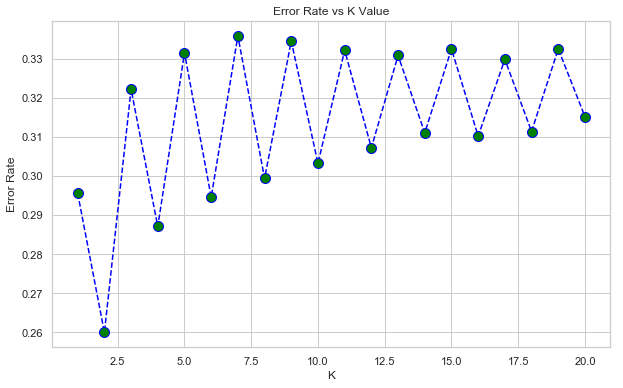

In [156]:
# Function
error_rate = []

for i in range (1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(1,21), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [163]:
# Fit new KNN
# Create model object
knn = KNeighborsClassifier(n_neighbors = 2)

# Fit new KNN on training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [164]:
# Predict new KNN
y_pred_knn_op = knn.predict(X_test)

In [169]:
# Score it with new KNN
print('K-Nearest Neighbors(KNN)')
print('k = 2')

# Confusion Matrix
print('\n')
print(confusion_matrix(y_test, y_pred_knn_op))

# Classification Report
print('--'*40)
print('Classfication Report',classification_report(y_test, y_pred_knn_op))

# Accuracy
print('--'*40)
knn_op_accuracy =round(accuracy_score(y_test, y_pred_knn_op)*100,2)
print('Accuracy',knn_op_accuracy,'%')

K-Nearest Neighbors(KNN)
k = 2


[[3956  748]
 [ 812  484]]
--------------------------------------------------------------------------------
Classfication Report               precision    recall  f1-score   support

           0       0.83      0.84      0.84      4704
           1       0.39      0.37      0.38      1296

    accuracy                           0.74      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.74      0.74      0.74      6000

--------------------------------------------------------------------------------
Accuracy 74.0 %


 By using the elbow method to find the optimal k value, the model's accuracy and precision improved to 74% and f1-score jumped to 74%. 

### ** DECISION TREE**

In [167]:
# Fit
# Import model
from sklearn.tree import DecisionTreeClassifier

# Create model object
dtree = DecisionTreeClassifier()

# Fit to training sets
dtree.fit(X_train,y_train)

# Predict
y_pred_dtree = dtree.predict(X_test)

# Score
print('Decision Tree')
# Confusion Matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_dtree))

# Classification Report
print('--'*40)
print('Classification Report',classification_report(y_test, y_pred_dtree))

# Accuracy
print('--'*40)
dtree_accuracy = round(accuracy_score(y_test, y_pred_dtree)*100,2)
print('Accuracy',dtree_accuracy,'%')


Decision Tree


Confusion Matrix
[[3648 1056]
 [ 725  571]]
--------------------------------------------------------------------------------
Classification Report               precision    recall  f1-score   support

           0       0.83      0.78      0.80      4704
           1       0.35      0.44      0.39      1296

    accuracy                           0.70      6000
   macro avg       0.59      0.61      0.60      6000
weighted avg       0.73      0.70      0.71      6000

--------------------------------------------------------------------------------
Accuracy 70.32 %


With an accuracy of just 70.3%, the decision tree performed worse than the other methods. 

In [175]:
# Tune a hyperparameter of Decision Tree

# Create model object
dtree = DecisionTreeClassifier(min_samples_leaf=20)
    
# Fit to training sets
dtree.fit(X_train,y_train)

# Predict
y_pred_dtree = dtree.predict(X_test)

# Score
print('Decision Tree')
# Confusion Matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_dtree))

# Classification Report
print('--'*40)
print('Classification Report',classification_report(y_test, y_pred_dtree))

# Accuracy
print('--'*40)
dtree_accuracy = round(accuracy_score(y_test, y_pred_dtree)*100,2)
print('Accuracy',dtree_accuracy,'%')


Decision Tree


Confusion Matrix
[[3791  913]
 [ 652  644]]
--------------------------------------------------------------------------------
Classification Report               precision    recall  f1-score   support

           0       0.85      0.81      0.83      4704
           1       0.41      0.50      0.45      1296

    accuracy                           0.74      6000
   macro avg       0.63      0.65      0.64      6000
weighted avg       0.76      0.74      0.75      6000

--------------------------------------------------------------------------------
Accuracy 73.92 %


With an accuracy of just 73.9%, the decision tree performed better than the default values.

### **RANDOM FOREST**

In [168]:
# Fit
# Import model object
from sklearn.ensemble import RandomForestClassifier

# Create model object
rfc = RandomForestClassifier(n_estimators = 200)

# Fit model to training data
rfc.fit(X_train,y_train)

# Predict
y_pred_rfc = rfc.predict(X_test)

# Score It
print('Random Forest')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rfc))

# Classification report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_rfc))

# Accuracy
print('--'*40)
rf_accuracy = round(accuracy_score(y_test, y_pred_rfc)*100,2)
print('Accuracy', rf_accuracy,'%')

Random Forest


Confusion Matrix
[[4235  469]
 [ 701  595]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4704
           1       0.56      0.46      0.50      1296

    accuracy                           0.81      6000
   macro avg       0.71      0.68      0.69      6000
weighted avg       0.79      0.81      0.80      6000

--------------------------------------------------------------------------------
Accuracy 80.5 %


 ### **FINAL RESULTS**
Random Forest produced the best performing model, at 80.5% accuracy with an F1 score of 80%.  The other classification models also performed well, but were a few percentage points lower in their evaluation metrics.  Additional parameter tuning could improve each model's performance even more, but this initial analysis proved to be a good starting point.  

In [ ]:
# Import Grid search
from sklearn.model_selection import GridSearchCV


In [ ]:
# creating our parameters to test
parameters={'criterion': ['gini','entropy'], 
            'min_samples_leaf' : range(5,100,15),
            'max_depth': range(2,20,1)}


In [ ]:
#create our estimaor
clf_tree=DecisionTreeClassifier(random_state=1)

#create the instance of GridSearchCV
grid_tree=GridSearchCV(clf_tree, parameters, cv=5, scoring='f1')

#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

In [ ]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

In [ ]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.f1_score(y_test, y_pred))

In [ ]:
dot_data = StringIO()
export_graphviz(grid_tree.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic_gs.png')
Image(graph.create_png())

In [ ]:
# The scorers can be either be one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid= parameters,
                  scoring=scoring, cv=5, refit='AUC', return_train_score=True)
gs.fit(X, y)
results = gs.cv_results_

In [ ]:
import numpy as np
from matplotlib import pyplot as plt



plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("max_depth")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 21)
ax.set_ylim(0.65, 1.1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_max_depth'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show();

In [ ]:
LogisticRegression(solver='saga')

In [ ]:
lr_clf = LogisticRegression(solver='saga')

In [ ]:
# Select three parameters to test.
parameters={'penalty':['l1','l2'], 'C': [0.001, 0.01, 0.1, 1]}

In [ ]:
#scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)

In [ ]:
#create the instance of GridSearchCV
grid_lr=GridSearchCV(estimator= lr_clf, param_grid=parameters,  cv=5, scoring='f1')

#fit the Gridsearch to our data
grid_lr.fit(X_train,y_train)

In [ ]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_lr.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_lr.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_lr.best_estimator_)

In [ ]:
#Predict the response for test dataset
y_pred_lr = grid_lr.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.f1_score(y_test, y_pred_lr))

In [ ]:
# repeat for KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNeighborsClassifier()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn= KNeighborsClassifier(metric='euclidean')

In [ ]:
# Select three parameters to test.
parameters={'n_neighbors': range(2,20,2), 'weights':['uniform'], 'metric':['euclidean','manhattan']}

In [ ]:
#create the instance of GridSearchCV
grid_knn=GridSearchCV(estimator= knn, param_grid=parameters,  cv=5, scoring='f1')

#fit the Gridsearch to our data
grid_knn.fit(X_train_scaled,y_train)

In [ ]:
# examine the best model (use tree where knn is)

# Single best score achieved across all params (min_samples_split)
print(grid_knn.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

In [ ]:
#Predict the response for test dataset
y_pred_knn = grid_knn.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.f1_score(y_test, y_pred_knn))

In [ ]:
# my decision tree classifier with maxdef of 5 is the best model. 

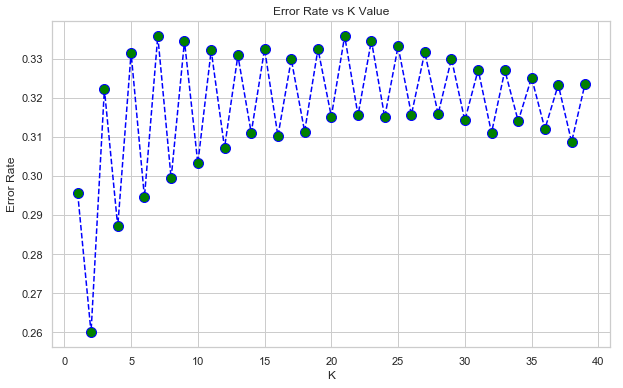

In [178]:
# Function
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

Confusion Matrix, without normalization
[[4235  469]
 [ 701  595]]


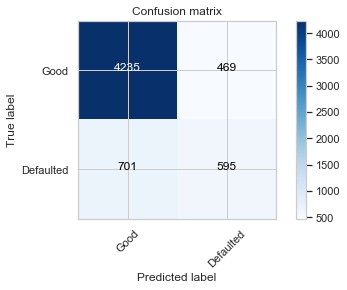

In [171]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_rfc)
classes = ['Good', 'Defaulted']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [ ]:
## Feature Selection

In [64]:
# upsample minority
defaulted_upsampled = resample(defaulted,
                          replace=True, # sample with replacement
                          n_samples=len(good_standing), # match number in majority class
                          random_state=23) # reproducible results

In [65]:
# combine majority and upsampled minority
upsampled = pd.concat([good_standing, defaulted_upsampled])

# check new class counts
upsampled['DEFAULT'].value_counts()

1    14017
0    14017
Name: DEFAULT, dtype: int64

In [66]:
# trying logistic regression again with the balanced dataset
y_train_upsampled = upsampled['DEFAULT']
X_train_upsampled = upsampled.drop('DEFAULT', axis=1)

In [44]:
#fit Model to resampled data

knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_upsampled, y_train_upsampled)

y_pred_class = knn.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_class))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, y_pred_class))

Test Accuracy score:  0.667
Test F1 score:  0.4540983606557377


In [28]:
X_train = X_train_2
X_test = X_test_2

In [29]:
from sklearn.feature_selection import RFECV

RMSE: 0.41157214137895776


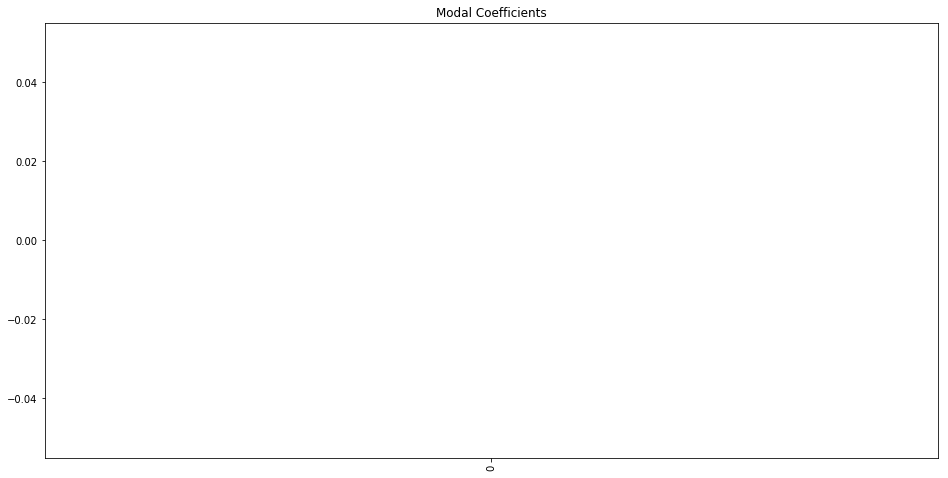

In [31]:
## training the model
from sklearn.linear_model import Lasso

lassoReg01 = Lasso(alpha=0.1, normalize=True)

lassoReg01.fit(X_train_2, y_train)

y_pred_lasso01 = lassoReg01.predict(X_test_2)

#calculating Rmse
RMSE_L01 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso01))

# print('MSE:', metrics.mean_squared_error(y_test2, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso01)))
# print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())

lasso_coef01 = pd.DataFrame(data=lassoReg01.coef_).T
lasso_coef01.columns = X_test_2.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))



In [32]:
lasso_coefs =  pd.concat([lasso_coef01, lasso_coef1, lasso_coef5], sort=True)

NameError: name 'lasso_coef1' is not defined

In [ ]:
selected_columns = X_train.columns[selector.support_]
removed_columns = X_train.columns[~selector.support_]

In [ ]:
poly_2_RFE_model = sm.OLS(list(y_train),sm.add_constant(X_train[selected_columns])).fit()
poly_2_RFE_model.summary()

In [ ]:
poly_2_RFE_model_sk = LinearRegression().fit(X_train[selected_columns],y_train)

In [57]:
df.describe()

,LIMIT_BAL,SEX,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,sep_bill,aug_bill,jul_bill,jun_bill,may_bill,apr_bill,aug_bill_payment,jul_bill_payment,jun_bill_payment,may_bill_payment,apr_bill_payment,mar_bill_payment,DEFAULT,EDUCATION_Y,EDUCATION_N,AGE_to_28,AGE_29_34,AGE_35_42,AGE_43_above,bal_1,bal_2,bal_3,bal_4,score_1,score_2,score_3,score_4
count,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000
mean,167825.729405,1.603608,1.550773,-0.014959,-0.134839,-0.165632,-0.217092,-0.261344,-0.285845,51589.034710,49521.698112,4.747483e+04,43796.589775,40748.049169,39226.852411,5687.720113,6.019571e+03,5253.322805,4824.490687,4825.033793,5245.642943,0.221176,0.817951,0.181591,0.267636,0.254886,0.253969,0.223509,43833.977999,4.145526e+04,35923.558482,34401.818617,0.079795,0.436268,0.095462,0.048210
std,129915.115993,0.489158,0.522431,1.120903,1.193044,1.193515,1.168719,1.133016,1.150394,74104.132627,71551.215125,7.001082e+04,64927.450125,61257.537699,60075.536736,16698.506577,2.454136e+04,17967.028860,15730.753527,15596.580167,17795.775322,0.415047,0.385893,0.385515,0.442736,0.435806,0.435289,0.416605,68815.416297,6.630107e+04,58612.023878,57241.304703,0.270981,0.495932,0.293859,0.214215
min,10000.000000,1.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-67526.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-696809.000000,-1.181069e+06,-355569.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3577.500000,2958.000000,2.718000e+03,2392.500000,1801.000000,1280.000000,1000.000000,8.585000e+02,395.000000,300.000000,269.500000,125.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22472.000000,21290.000000,2.022300e+04,19145.000000,18227.000000,17175.000000,2110.000000,2.012000e+03,1809.000000,1500.000000,1500.000000,1500.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16736.000000,1.614600e+04,13685.000000,11757.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67767.000000,64635.500000,6.096200e+04,55418.000000,50581.000000,49434.500000,5020.000000,5.000000e+03,4561.000000,4089.000000,4029.500000,4008.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,57591.000000,5.408350e+04,46211.500000,44875.000000,0.000000,1.000000,0.000000,0.000000
max,1000000.000000,2.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,933147.000000,6.766430e+05,877171.000000,911664.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
#df['EDUCATION_Y']=df['EDUCATION'].isin([1,2]).astype(int)
#df['EDUCATION_N']=df['EDUCATION'].isin([3,4,5,6]).astype(int)

In [63]:
#Age_below = list(range(0,29))
#Age_above = list(range(43,100))

In [64]:
#df['AGE_to_28']=df['AGE'].isin(Age_below).astype(int)
#df['AGE_29_34']=df['AGE'].isin([29,30,31,32,33,32,33,34]).astype(int)
#df['AGE_35_42']=df['AGE'].isin([35,36,37,38,39,40,41,42]).astype(int)
#df['AGE_43_above']=df['AGE'].isin(Age_above).astype(int)

In [66]:
#df.drop(['AGE', 'EDUCATION'], axis=1)

,LIMIT_BAL,SEX,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,sep_bill,...,bal_2,bal_3,bal_4,credit_over_80,EDUCATION_Y,EDUCATION_N,AGE_to_28,AGE_29_34,AGE_35_42,AGE_43_above
0,50000,1,2,0,0,0,0,0,0,90231,...,89525,89418,98228,True,1,0,0,0,0,1
1,30000,1,1,0,0,0,0,0,0,20893,...,17273,14253,9714,False,1,0,0,0,1,0
2,260000,1,2,0,0,0,0,0,0,158711,...,97589,54138,37334,False,1,0,1,0,0,0
3,200000,2,1,0,0,0,0,0,0,23762,...,24988,19131,9774,False,1,0,0,1,0,0
4,50000,1,2,0,0,0,0,0,0,14614,...,15064,17064,17412,False,1,0,1,0,0,0
5,150000,2,1,0,0,0,0,0,0,21787,...,22435,24032,28552,False,1,0,0,0,0,1
6,400000,2,2,-2,-2,-2,-2,-2,-2,43672,...,0,0,0,False,1,0,0,0,1,0
7,360000,2,2,0,-1,-1,-1,-2,-2,3386,...,0,0,0,False,1,0,0,1,0,0
8,160000,2,2,2,2,2,2,-1,0,400,...,400,0,20818,False,1,0,0,1,0,0
9,500000,2,1,0,-1,-1,0,0,0,329570,...,-220,189378,128369,False,1,0,0,0,0,1


In [10]:
dfMJ = df.copy()

In [58]:
#dfMJ['credit_over_80']=df['credit_over_80'].astype(int)
df['credit_over_80']=df['credit_over_80'].astype(int)

In [89]:
dfMJ.head()

,LIMIT_BAL,SEX,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,sep_bill,aug_bill,jul_bill,jun_bill,may_bill,apr_bill,aug_bill_payment,jul_bill_payment,jun_bill_payment,may_bill_payment,apr_bill_payment,mar_bill_payment,default payment next month,EDUCATION_Y,EDUCATION_N,AGE_to_28,AGE_29_34,AGE_35_42,AGE_43_above,bal_1,bal_2,bal_3,bal_4,credit_over_80,score_1,score_2,score_3,score_4
0,50000,1,2,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1,1,0,0,0,0,1,87795,89525,89418,98228,1,0,1,0,0
1,30000,1,1,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0,1,0,0,0,1,0,20199,17273,14253,9714,0,0,1,0,0
2,260000,1,2,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0,1,0,1,0,0,0,99796,97589,54138,37334,0,0,1,0,0
3,200000,2,1,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0,1,0,0,1,0,0,21944,24988,19131,9774,0,0,1,0,0
4,50000,1,2,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0,1,0,1,0,0,0,14064,15064,17064,17412,0,0,1,0,0


## Add Polynomials

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
X_train = X_train
X_test = X_test

In [21]:
columns = list(X_train.columns)
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_2.fit(X_train)
X_train_2= pd.DataFrame(poly_2.transform(X_train), columns=poly_2.get_feature_names(columns))
X_test_2= pd.DataFrame(poly_2.transform(X_test), columns=poly_2.get_feature_names(columns))
columns_2  = poly_2.get_feature_names(columns)

In [22]:
scaler_2 = StandardScaler()

scaler_2.fit(X_train_2)
X_train_2 = pd.DataFrame(X_train_2, columns = columns_2)
X_test_2 = pd.DataFrame(X_test_2, columns = columns_2)

In [23]:
#Make polynomial Modeltesting possible and store Raw DataFrame
poly_2.fit(X_engineered_before_split)
X_engineered_before_split = pd.DataFrame(poly_2.transform(X_engineered_before_split), columns=poly_2.get_feature_names(X_engineered_before_split.columns))
X_engineered_before_split.shape

(23999, 702)

### Recursive Feature Elimination

In [30]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=40)

selector.fit(X_train_2, y_train)

SelectKBest(k=40, score_func=<function f_regression at 0x1a282f5488>)

In [62]:
selected_columns = X_train_2.columns[selector.get_support()]
removed_columns = X_train_2.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [33]:
list(removed_columns)

['LIMIT_BAL',
 'SEX',
 'MARRIAGE',
 'sep_bill',
 'aug_bill',
 'jul_bill',
 'jun_bill',
 'may_bill',
 'apr_bill',
 'aug_bill_payment',
 'jul_bill_payment',
 'jun_bill_payment',
 'may_bill_payment',
 'apr_bill_payment',
 'mar_bill_payment',
 'EDUCATION_Y',
 'EDUCATION_N',
 'AGE_to_28',
 'AGE_29_34',
 'AGE_35_42',
 'AGE_43_above',
 'bal_1',
 'bal_2',
 'bal_3',
 'bal_4',
 'credit_over_80',
 'score_1',
 'score_2',
 'LIMIT_BAL^2',
 'LIMIT_BAL SEX',
 'LIMIT_BAL MARRIAGE',
 'LIMIT_BAL PAY_0',
 'LIMIT_BAL PAY_2',
 'LIMIT_BAL PAY_3',
 'LIMIT_BAL PAY_4',
 'LIMIT_BAL PAY_5',
 'LIMIT_BAL PAY_6',
 'LIMIT_BAL sep_bill',
 'LIMIT_BAL aug_bill',
 'LIMIT_BAL jul_bill',
 'LIMIT_BAL jun_bill',
 'LIMIT_BAL may_bill',
 'LIMIT_BAL apr_bill',
 'LIMIT_BAL aug_bill_payment',
 'LIMIT_BAL jul_bill_payment',
 'LIMIT_BAL jun_bill_payment',
 'LIMIT_BAL may_bill_payment',
 'LIMIT_BAL apr_bill_payment',
 'LIMIT_BAL mar_bill_payment',
 'LIMIT_BAL EDUCATION_Y',
 'LIMIT_BAL EDUCATION_N',
 'LIMIT_BAL AGE_to_28',
 'LIMIT_BA

In [67]:
selected_columns = list(selected_columns)

In [74]:
selected_columns

['PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'score_3',
 'score_4',
 'PAY_0^2',
 'PAY_0 PAY_2',
 'PAY_0 score_2',
 'PAY_0 score_3',
 'PAY_0 score_4',
 'PAY_2^2',
 'PAY_2 PAY_3',
 'PAY_2 PAY_4',
 'PAY_2 PAY_5',
 'PAY_2 PAY_6',
 'PAY_2 score_2',
 'PAY_2 score_3',
 'PAY_2 score_4',
 'PAY_3^2',
 'PAY_3 PAY_4',
 'PAY_3 score_2',
 'PAY_3 score_4',
 'PAY_4^2',
 'PAY_4 score_2',
 'PAY_4 score_4',
 'PAY_5^2',
 'PAY_5 score_2',
 'PAY_5 score_4',
 'PAY_6^2',
 'PAY_6 score_2',
 'PAY_6 score_4',
 'score_1 score_4',
 'score_2 score_3',
 'score_2 score_4',
 'score_3^2',
 'score_3 score_4',
 'score_4^2']

In [69]:
X_train = X_train_2[selected_columns]
X_test = X_test_2[selected_columns]

In [70]:
# Create instance of model
lreg = LogisticRegression()

# Pass training data into model
lreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
# Predict
y_pred_lreg = lreg.predict(X_test)

In [72]:
# Score It
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))

# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[4673    1]
 [1325    1]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4674
           1       0.50      0.00      0.00      1326

    accuracy                           0.78      6000
   macro avg       0.64      0.50      0.44      6000
weighted avg       0.72      0.78      0.68      6000

--------------------------------------------------------------------------------
Accuracy 77.9 %


### **Interpretation**  
**Accuracy**  
77.9% of the model's predictions are correct.

**Precision**  
Precision is  measure of how precise the model's predictions are.  When the model predicts a default, that individual actually *did* default 72% of the time.

**Recall (Sensitivity)**  
If there a defaulting individual is present in the test set, the model is able to identify (recall) it 78% of the time.    

**F1 Score**  
F1 Score is the weighted average of precision and recall. An F1 Score of 68 means that 68% of the time:

- when the model predicts a default, you can be confident that person actually did default and it is not a false positive.
- when there is an actual defaulting person in the dataset, the model is able to detect it

Our F1 score of  68 decreased over the base model with this feature selection step.


## Downsample majority

In [25]:
# downsample majority
good_standing_downsampled = resample(good_standing,
                                replace = False, # sample without replacement
                                n_samples = len(defaulted), # match minority n
                                random_state = 23) # reproducible results


In [26]:
# combine majority and upsampled minority
downsampled = pd.concat([good_standing_downsampled, defaulted])

# check new class counts
downsampled['DEFAULT'].value_counts()

1    3982
0    3982
Name: DEFAULT, dtype: int64

In [27]:
# trying logistic regression again with the balanced dataset
y_train_downsampled = downsampled['DEFAULT']
X_train_downsampled = downsampled.drop('DEFAULT', axis=1)

In [38]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train_downsampled, y_train_downsampled)

y_pred_class = knn.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_class))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, y_pred_class))


Test Accuracy score:  0.7391666666666666
Test F1 score:  0.48366875618607724


In [29]:
# Tomek
tl = TomekLinks()
X_tl, y_tl = tl.fit_sample(X_train, y_train)

In [39]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_tl, y_tl)

y_pred_class = knn.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_class))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, y_pred_class))

Test Accuracy score:  0.8086666666666666
Test F1 score:  0.4501915708812261


In [ ]:
# Identify numeric features
print('Outlier Exploraiton')
print(df[['LIMIT_BAL','AGE']].describe().transpose())
print('--'*40)
print('Discrete Variables')
print(titanic.groupby('Pclass').Pclass.count())
print(titanic.groupby('SibSp').SibSp.count())
print(titanic.groupby('Parch').Parch.count())

# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(titanic['Pclass'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Pclass', fontsize = 15)
ax1.set_ylabel('# Passengers',fontsize = 15)
ax1.set_title('Passenger Class',fontsize = 15)

ax2 = fig.add_subplot(323)
ax2.hist(titanic['Age'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Age',fontsize = 15)
ax2.set_ylabel('# Passengers',fontsize = 15)
ax2.set_title('Age of Passengers',fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(titanic['SibSp'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('SibSp',fontsize = 15)
ax3.set_ylabel('# Passengers',fontsize = 15)
ax3.set_title('Passengers with Spouses or Siblings',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(titanic['Parch'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Parch',fontsize = 15)
ax4.set_ylabel('# Passengers',fontsize = 15)
ax4.set_title('Passengers with Children',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(titanic['Fare'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Fare',fontsize = 15)
ax5.set_ylabel('# Passengers',fontsize = 15)
ax5.set_title('Ticket Fare',fontsize = 15)

plt.show()

In [180]:
dfMJZ = pd.read_csv('output.csv')

In [181]:
len(dfMJZ)

23999

In [182]:
dfMJZ.tail(10)

,Unnamed: 0,LIMIT_BAL,80%,match 100,MatchA,Match J,Match JUN,MatchM,default,STAT_AUG,BILL_JUL,PAID_AUG,Bal_AUG,STAT_JUL,BILL_JUN,PAID_JUL,Bal_JUL,STAT_JUN,BILL_MAY,PAID_JUN,Bal_JUN,STAT_MAY,BILL_APR,PAID_MAY,Bal_MAY
23989,23989,420000,336000,0,0,0,0,0,0,-2,277510,277510,0,-1,279493,10000,269493,0,285447,10000,275447,0,291183,10000,281183
23990,23990,30000,24000,0,0,0,0,0,1,2,8165,1200,6965,0,8529,500,8029,0,8743,500,8243,0,8949,500,8449
23991,23991,50000,40000,0,1,0,0,0,0,0,47991,1018,46973,0,0,0,0,0,0,0,0,-2,0,0,0
23992,23992,10000,8000,0,1,0,0,1,0,0,9000,0,9000,2,0,1000,-1000,2,10500,10500,0,-1,10674,368,10306
23993,23993,560000,448000,0,0,0,0,0,0,-1,23445,23560,-115,-1,105199,109726,-4527,-1,47519,48237,-718,-1,73537,74014,-477
23994,23994,330000,264000,0,0,0,0,0,0,0,40786,2600,38186,0,41767,1500,40267,0,42501,1400,41101,0,43359,1400,41959
23995,23995,500000,400000,0,0,0,0,0,0,0,1697,1697,0,-1,-107,0,-107,-1,2693,2800,-107,-1,5393,5400,-7
23996,23996,50000,40000,1,1,1,0,0,0,0,89215,5000,84215,0,93908,5000,88908,0,14308,1000,13308,0,14808,500,14308
23997,23997,300000,240000,0,0,0,0,0,1,-2,4576,4599,-23,-2,3567,3585,-18,-2,2180,2180,0,-2,644,644,0
23998,23998,60000,48000,0,0,0,0,0,0,0,22243,7243,15000,0,20938,5000,15938,0,22486,5000,17486,0,21394,5394,16000


In [192]:
dfMJZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 25 columns):
Unnamed: 0    23999 non-null int64
LIMIT_BAL     23999 non-null int64
80%           23999 non-null int64
match 100     23999 non-null int64
MatchA        23999 non-null int64
Match J       23999 non-null int64
Match JUN     23999 non-null int64
MatchM        23999 non-null int64
default       23999 non-null int64
STAT_AUG      23999 non-null int64
BILL_JUL      23999 non-null int64
PAID_AUG      23999 non-null int64
Bal_AUG       23999 non-null int64
STAT_JUL      23999 non-null int64
BILL_JUN      23999 non-null int64
PAID_JUL      23999 non-null int64
Bal_JUL       23999 non-null int64
STAT_JUN      23999 non-null int64
BILL_MAY      23999 non-null int64
PAID_JUN      23999 non-null int64
Bal_JUN       23999 non-null int64
STAT_MAY      23999 non-null int64
BILL_APR      23999 non-null int64
PAID_MAY      23999 non-null int64
Bal_MAY       23999 non-null int64
dtypes: int64(25

In [195]:
dfMJZ['PRED1']= dfMJZ['STAT_AUG']==-2 + dfMJZ['STAT_JUL']==-2 + dfMJZ['STAT_JUN']==-2 + dfMJZ['STAT_MAY']==-2


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().